------------Numerical Analysis Project------------
===
Zarkadoulas Evangelos 

Tsantikis Georgios  

.




.





.


Importing the necessary libraries for solving the problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

___
LU and QR Factorizations
===
___
The 'LUmine' is used exactly as provided in the PDF file for the assignment. In 'QRmine,' the required code sections were added so that it functions correctly.

In [2]:
def LUmine(A):
    n = A.shape[0]
    L = np.matrix(np.identity(n))
    U = A

    for j in range(0, n-1):
        for i in range(j+1, n):
            mult = A[i, j] / A[j, j]
            A[i, j+1:n] = A[i, j+1:n] - mult * A[j, j+1:n]
            U[i, j+1:n] = A[i, j+1:n]
            L[i, j] = mult
            U[i, j] = 0

    return L, U

def QRmine(A):
    n = A.shape[0]
    Q = np.zeros((n, n))

    for j in range(n):
        q = A[:, j]
        for i in range(j):
            length_of_leg = np.sum(A[:, j].T * Q[:, i])
            q = q - length_of_leg * Q[:, i]
        Q[:, j] = q / np.linalg.norm(q)
    
    R = np.dot(Q.T,A)
    
    return Q, R

___
Hilbert Matrices
===
___

Task A

In the following code, I create an n*n 'Hilbert' matrix named H. I initialize a zero matrix H and then run a for loop with the limits set by the dimensions of matrix H, calculating the elements of H.

In [3]:

def hilbertMat(n):
    H = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            H[i][j] = 1 / (i + j + 1) 
    
    return H

I test the above code for the values n=3, n=7, n=10. I conclude that the code works correctly.

In [4]:
values = [3, 7, 10]

for n in values:
    print(f"Matrice for n = {n}:")
    Η = hilbertMat(n)
    print(Η)
    print()
    print()


Matrice for n = 3:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


Matrice for n = 7:
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125     ]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1       ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308]]


Matrice for n = 10:
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0

Task Β

In the following code, I create a function that takes the dimension of a vector n as an argument and returns a vector with elements equal to 1.

In [5]:

def allonesvector(n):
    vector = np.ones((n, 1))
    return vector

The following code implements 'linEquat,' which takes as arguments a 'Hilbert matrix H' and a vector 'b' (with elements equal to 1 in this case) and solves the system 'Hx=b' using QR factorization. We obtain the matrices Q and R using the 'QRmine' defined above. We calculate the product 'Q^T * b.' We solve the system 'R * x = Q^T * b' using the function np.linalg.solve.

In [6]:

def linEquat(H,b):
    Q,R = QRmine(H)
    QTB = np.dot(Q.T, b)
    x = np.linalg.solve(R,QTB)
    return x

I test 'linEquat'

In [7]:
n = 5
b = allonesvector(n)
H = hilbertMat(n)
x = linEquat(H,b)
print(x)

[[    5.]
 [ -120.]
 [  630.]
 [-1120.]
 [  630.]]


Task C

The following code implements 'almost_allonesvector,' which takes a vector as an argument and slightly modifies the value of its first element. Specifically, it adds \(10^{-15}\) to this number.

In [8]:

def almost_allonesvector(vector):
    vector[0] += 1e-15
    return vector

In the following code, I solve the system 'H*x = b' again, but this time I also solve the system 'H*xnew = bnew,' where bnew is a vector with elements equal to one, except for the first element, to which \(10^{-15}\) has been added, and I obtain xnew. Then, I call the function 'np.max(np.abs(x − xnew))' to compute the maximum absolute difference. I observe that it returns the result: '6.821210263296962e-13.' I expected a very small value for dif (zero) due to the very small difference between x and xnew. However, the dif is greater than I would have anticipated. I conclude that the small difference in b plays a larger role than expected in the solution of the system.

In [9]:
n = 5
b = allonesvector(n)
H = hilbertMat(n)
x = linEquat(H,b)
bnew = almost_allonesvector(b)
xnew = linEquat(H,bnew)
dif = np.max(np.abs(x - xnew))
print(dif)


0.0


Task D

In the following code, I create a plot with values (3,151) on the horizontal axis, which are stored in an array n, and the values of the maximum absolute difference on the vertical axis. To create the plot, I import the 'Matplotlib' library. I define a zero array 'dif' with a size equal to that of array n. By executing a for loop, I store the maximum absolute difference values in the dif array for the different values of n. Then, I create the plot. From the plot, we observe that the maximum absolute difference 'dif' tends to decrease as n increases, with some exceptions. This indicates that the solutions x and xnew tend to 'approach' each other; therefore, we conclude that the accuracy of the solutions decreases.

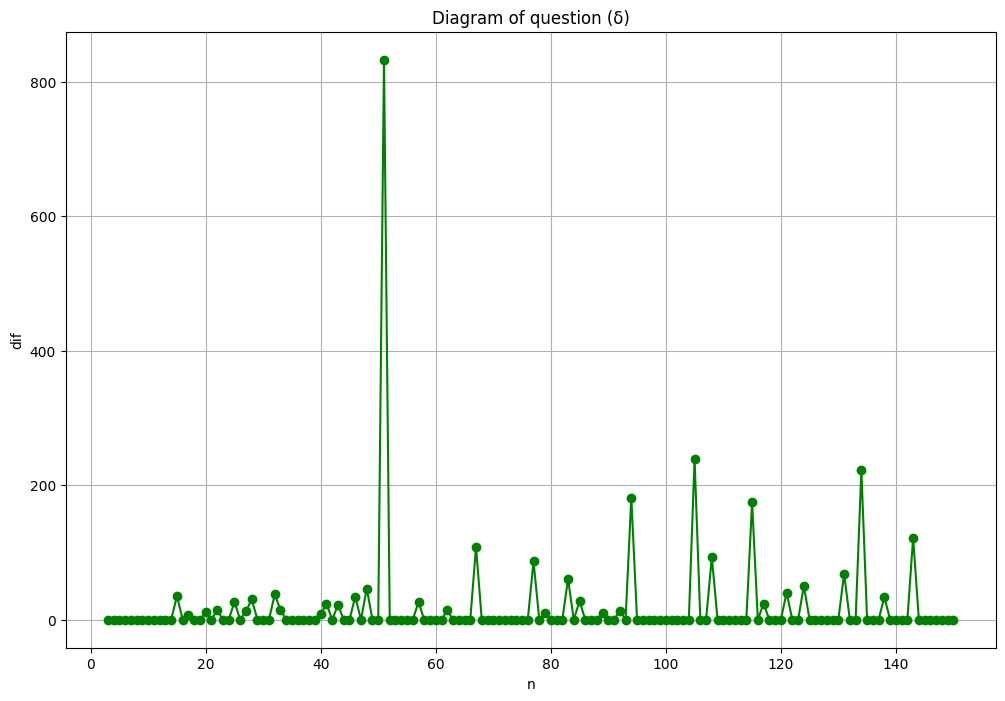

In [10]:
n = np.arange(3, 151)
dif = np.zeros(len(n))


for i in range(len(n)):
    b = allonesvector(n[i])
    H = hilbertMat(n[i])
    x = linEquat(H,b)
    bnew = almost_allonesvector(b)
    xnew = linEquat(H,bnew)
    dif[i] = np.max(np.abs(x - xnew))
    
plt.figure(figsize=(12,8))
plt.plot(n, dif, 'go-')
plt.title('Diagram of question (δ)')
plt.xlabel('n')
plt.ylabel('dif')
plt.grid(True)
plt.show()

Task Ε

In the following code, I take the same values of n that I used earlier and define a zero array of the same size as n to store the '2-norm' of the difference between the identity matrix and the matrix product \(H \cdot H^{-1}\) for each different value of n. Inside the for loop, I create the matrices H and \(H^{-1}\), find their product, and then compute the 2-norm of the difference between the identity matrix and their product. Finally, an array 'norm2' has been created containing the 2-norms we calculated for the different values of n. Using the same method as before, I create a plot with the values of n on the horizontal axis and the 2-norm values on the vertical axis. What we observe from the plot is that the accuracy of the inverse matrix decreases as the size of the Hilbert matrix increases, as the 2-norm increases with the increase of n (with some exceptions).

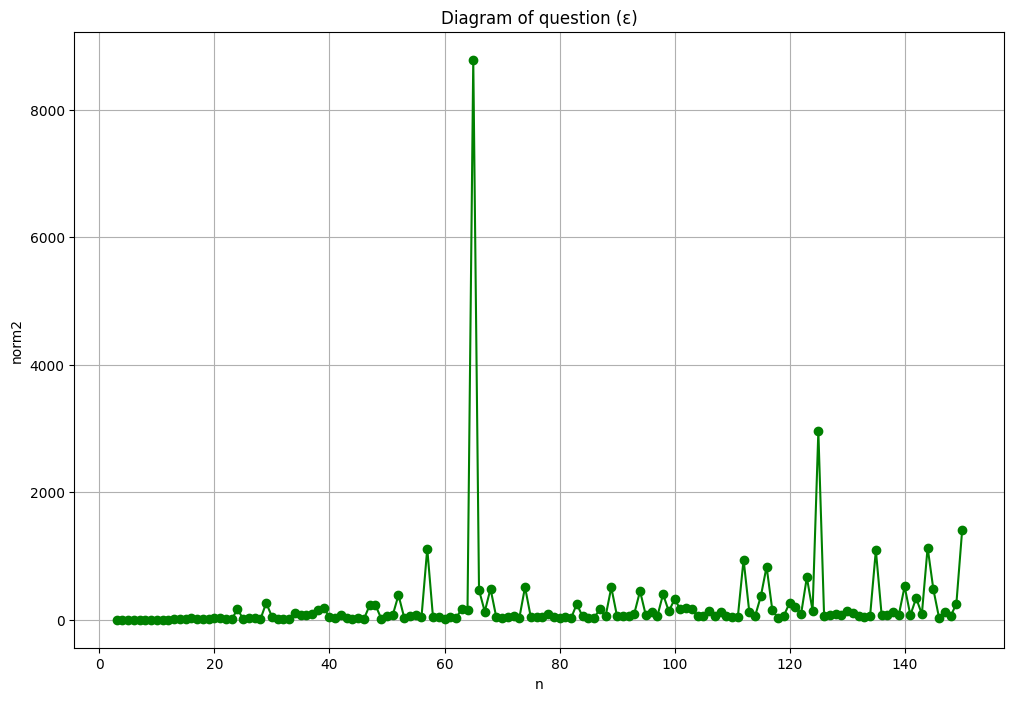

In [11]:
n = np.arange(3, 151)
norm2 = np.zeros(len(n))

for i in range(len(n)):
    H = hilbertMat(n[i])
    Hinv = np.linalg.inv(H)
    dot = np.dot(H, Hinv)
    diaf = np.identity(n[i]) - dot
    norm2[i] = np.linalg.norm(diaf, ord=2)

plt.figure(figsize=(12,8))
plt.title('Diagram of question (ε)')
plt.plot(n, norm2, 'go-')
plt.xlabel('n')
plt.ylabel('norm2')
plt.grid(True)
plt.show()

___
APPROXIMATION PROBLEM
===
___

Creation of the array t that contains 50 points between 0 and 1, evenly spaced using 'np.linspace.' For the creation of the vector y, we used the suggested method of input.

In [12]:
n=50 
t = np.linspace(0, 1, n)
y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])

Creation of the array A that contains the Vandermonde matrix of t with 5 columns. The Vandermonde matrix is used because each i-th column contains the array t raised to the power of i (for i = 0 to n-1), which can help in constructing the required polynomial.

In [13]:
A = np.vander(t, 5)

Solving a system of linear equations using the least squares method, utilizing the matrix A (system of equations) and the vector y (A * coef = y). The 'rcond=None' is the default value of the function. By using '[0]', we obtain the desired coefficients, as 'np.linalg.lstsq' returns additional information beyond the optimal coefficients array.

'coef' is the array of optimal coefficients of the polynomial.

'deg' is the degree of the polynomial.

'pol' contains the polynomial in a string format for the correct printing of the result.

Print the polynomial of degree 4 that best approximates the function y.

In [14]:
coef = np.linalg.lstsq(A, y, rcond=None)[0]

deg = len(coef) - 1
pol = ""
for i in range(deg, -1, -1):
    if i == deg: pol += f"{coef[i]}t^{i}"
    elif i == 0: pol += f" + {coef[i]}"
    else: pol += f" + {coef[i]}t^{i}"

print("Polynomial Equation:")
print(pol)

Polynomial Equation:
0.945058042572283t^4 + 2.141139485910786t^3 + -19.8404339860269t^2 + 23.921263201992957t^1 + -7.824426375720462


Initially, I calculate the decomposition for each method. Then, I solve the corresponding system of linear equations using the function 'np.linalg.solve' (where 'LU_coef' and 'QR_coef' are the coefficients of the polynomial). For LU, I first solve 'Lb = A.T.dot(y)' and then 'Ux = b'. For QR, I solve 'Rx = Q.T @ A.T @ y'.

Next, I compute the approximation of the polynomial function using the function 'np.polyval' and store the results in the variables 'LU_approx' and 'QR_approx'.

Finally, I calculate the sum of squared errors using the LU and QR factorizations and store the results in the variables 'LU_sum_er' and 'QR_sum_er'.

In [15]:
L,U= LUmine(A.T.dot(A))
b= np.linalg.solve(L, A.T.dot(y))
LU_coef= np.linalg.solve(U, b)
LU_approx= np.polyval(LU_coef, t)
LU_sum_er= np.sum((LU_approx - y) ** 2)

Q,R= QRmine(A.T.dot(A))
QR_coef= np.linalg.solve(R, Q.T @ A.T @ y)
QR_approx= np.polyval(QR_coef, t)
QR_sum_er= np.sum((QR_approx - y) ** 2)

print("Sum of Squared Errors with Factorization LU:", LU_sum_er)
print("Sum of Squared Errors with Factorization QR:", QR_sum_er)

Sum of Squared Errors with Factorization LU: 0.4942837009251174
Sum of Squared Errors with Factorization QR: 0.4942837009251169


Creation of a plot for visualizing the data and the approximation curves using LU and QR factorizations. The data points (coordinates of the plot) will be at (t[i], y[i]) for each element i of the arrays t and y. The values 'LU_approx' and 'QR_approx' represent the values on the y-axis of the approximations.

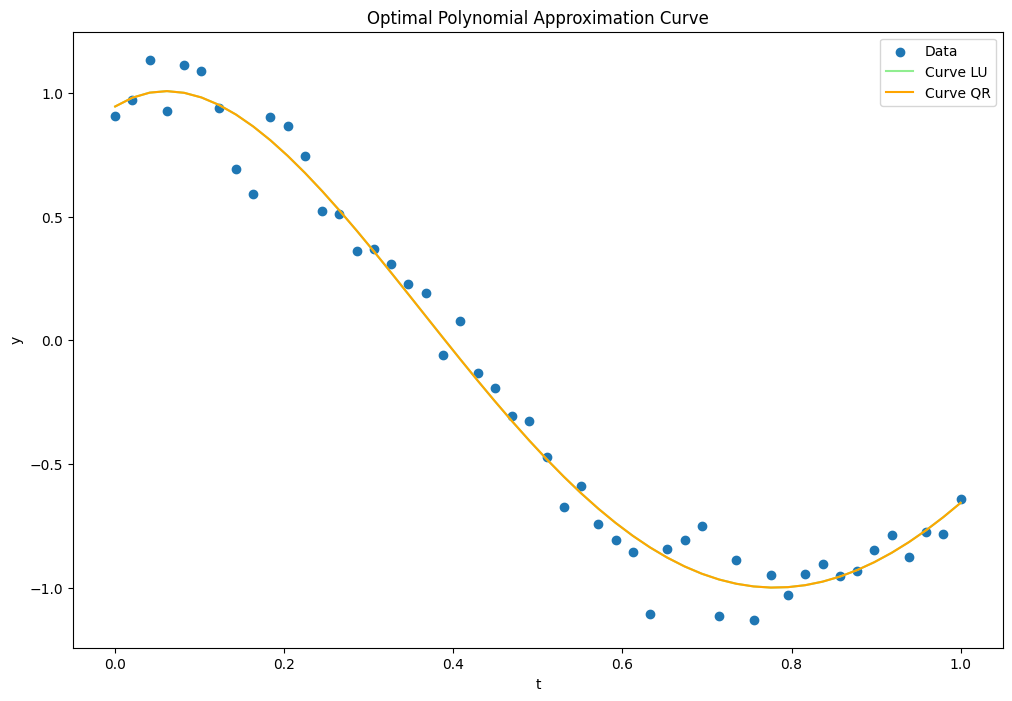

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(t, y, label='Data')
plt.plot(t, LU_approx, color='lightgreen', label='Curve LU')
plt.plot(t, QR_approx, color='orange', label='Curve QR')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Optimal Polynomial Approximation Curve')
plt.show()